# Environment Setup:

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Furniture-DS"

# Install PyTorch and other libraries
!pip install torch torchvision

# Clone YOLOv7 repository
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7

# Install other dependencies if required
!pip install opencv-python-headless

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Furniture-DS
Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197
Receiving objects: 100% (1197/1197), 74.23 MiB | 13.57 MiB/s, done.
Resolving deltas: 100% (519/519), done.
Updating files: 100% (108/108), done.
/content/drive/MyDrive/Furniture-DS/yolov7


# Install Requirements:

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.0 MB/s eta 0:00:00


# Modify (data.yaml) file with the right paths:

In [ ]:
%%writefile /content/drive/MyDrive/Furniture-DS/data.yaml


train: /content/drive/MyDrive/Furniture-DS/train
val:   /content/drive/MyDrive/Furniture-DS/valid
test: /content/drive/MyDrive/Furniture-DS/test


# number of classes
nc: 11

names: ['ac', 'bunk_beds', 'chairs', 'closet', 'double_size_bed', 'fridge', 'single_size_bed', 'sofa', 'table', 'tv', 'washer']

roboflow:
  workspace: ntutseniorproject
  project: furniture-detection-xtqug
  version: 2
  license: Public Domain
  url: https://universe.roboflow.com/ntutseniorproject/furniture-detection-xtqug/dataset/2

Overwriting /content/drive/MyDrive/Furniture-DS/data.yaml


# Start Training:

In [ ]:
!python /content/drive/MyDrive/Furniture-DS/yolov7/train.py \ # The path to the YOLOv7 training script.
    --img-size 640 \ # Sets the image size for training to 640x640 pixels.
    --batch-size 8 \ # This is the number of images the model will process at once.
    --epochs 100 \   # Sets the number of training cycles (epochs) to 100.
    --data /content/drive/MyDrive/Furniture-DS/data.yaml \    # Path to the dataset configuration file.
    --cfg /content/drive/MyDrive/Furniture-DS/yolov7/cfg/training/yolov7-tiny.yaml \  # Points to the model configuration file for YOLOv7-tiny.
    --weights yolov7-tiny.pt  # Using YOLOv7-tiny pre-trained weights

2024-01-18 17:18:46.252152: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-18 17:18:46.252220: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-18 17:18:46.253743: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-18 17:18:46.261853: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-18 17:18:47.340176: W tensorflow/comp

# **Evaluation:** evaluate the model on the validation dataset to check for overfitting, underfitting, and to get an insight into how well the model generalizes to new data.

In [ ]:
!python /content/drive/MyDrive/Furniture-DS/yolov7/detect.py \ # YOLOv7 detection script which will perform object detection on the provided images
    --weights /content/drive/MyDrive/Furniture-DS/yolov7/runs/train/exp3/weights/best.pt \ # Specifies the path to the trained model weights that performed the best.
    --img 640 \
    --conf 0.25 \ # Sets the confidence threshold for detections, detections with a confidence score lower than this value will be discarded.
    --source /content/drive/MyDrive/Furniture-DS/valid/images \ # The path to the directory containing the images
    --save-txt \
    --save-conf  # Saves the detection bounding box coordinates and confidence scores to text files.


Streaming output truncated to the last 5000 lines.
 The image with the result is saved in: runs/detect/exp3/01427f295a313b3b_jpg.rf.6980a37b99e5ebc0eb50adbe95d79a7a.jpg
1 tv, Done. (5.9ms) Inference, (1.1ms) NMS
 The image with the result is saved in: runs/detect/exp3/016f9be9c00a307f_jpg.rf.621ebf750df16bf75333519bfe72d182.jpg
1 double_size_bed, 1 sofa, Done. (5.9ms) Inference, (1.0ms) NMS
 The image with the result is saved in: runs/detect/exp3/017ebd45ca8ffd8f_jpg.rf.603822fa22189df2c1fcbe633c3fb9f8.jpg
1 tv, Done. (5.9ms) Inference, (1.0ms) NMS
 The image with the result is saved in: runs/detect/exp3/018bd1be7661cc9c_jpg.rf.3a24d098ddc0b24647dbca0d6158cff4.jpg
Done. (5.9ms) Inference, (0.7ms) NMS
 The image with the result is saved in: runs/detect/exp3/018c17a711ea3f1e_jpg.rf.07d65ee0d84c3644a0d851f6d6252e37.jpg
1 table, Done. (5.9ms) Inference, (1.1ms) NMS
 The image with the result is saved in: runs/detect/exp3/0197c2a9e047e19f_jpg.rf.0e921a728e47c2d0491937695264326d.jpg
1 double

In [ ]:
import os
import pandas as pd

# Define a function to aggregate detection results from text files.
def aggregate_detections(det_folder):
    data = []
    for file in os.listdir(det_folder):
        if file.endswith(".txt"):
            with open(os.path.join(det_folder, file), 'r') as f:
                for line in f:
                    class_id, x_center, y_center, width, height, conf = map(float, line.split())
                    data.append([file, class_id, x_center, y_center, width, height, conf])

    df = pd.DataFrame(data, columns=['Image', 'Class_ID', 'X_center', 'Y_center', 'Width', 'Height', 'Confidence'])
    return df

# Path to the folder where the text files are saved
det_folder = '/content/drive/MyDrive/Furniture-DS/yolov7/runs/detect/exp3/labels'
df_detections = aggregate_detections(det_folder)

# df_detections now contains all detection data from the text files.
# This DataFrame can be used to perform various analyses on the detection results.

In [ ]:
# Count detections per class
detection_counts = df_detections['Class_ID'].value_counts()

# Average confidence score per class
average_confidence = df_detections.groupby('Class_ID')['Confidence'].mean()

print(detection_counts)
print(average_confidence)


7.0     1159
4.0      550
3.0      462
9.0      401
8.0      220
10.0     218
0.0      179
2.0      164
6.0      160
1.0      144
5.0      128
Name: Class_ID, dtype: int64
Class_ID
0.0     0.726204
1.0     0.671444
2.0     0.410561
3.0     0.629419
4.0     0.584754
5.0     0.679697
6.0     0.516679
7.0     0.621442
8.0     0.394414
9.0     0.684275
10.0    0.715952
Name: Confidence, dtype: float64


Create visualizations for the results of object detection evalution

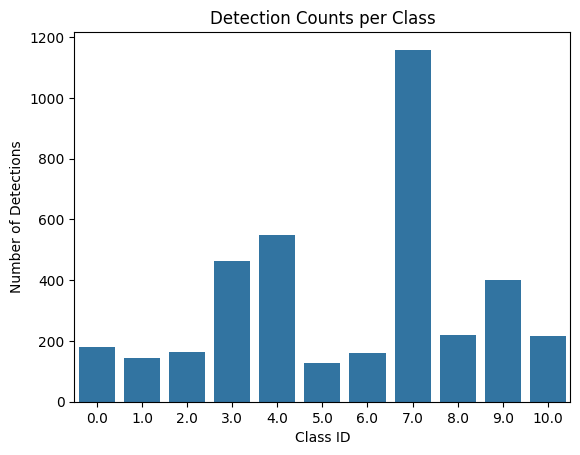

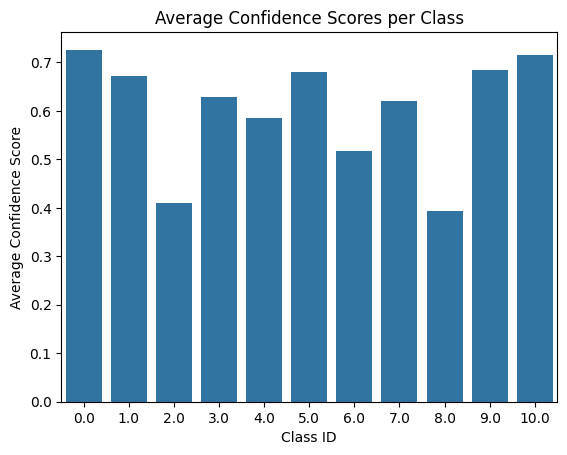

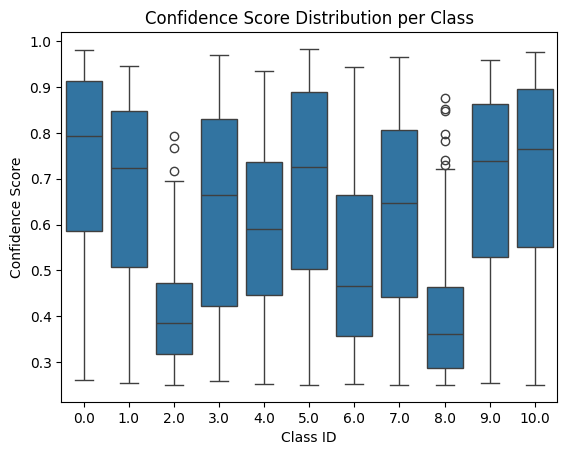

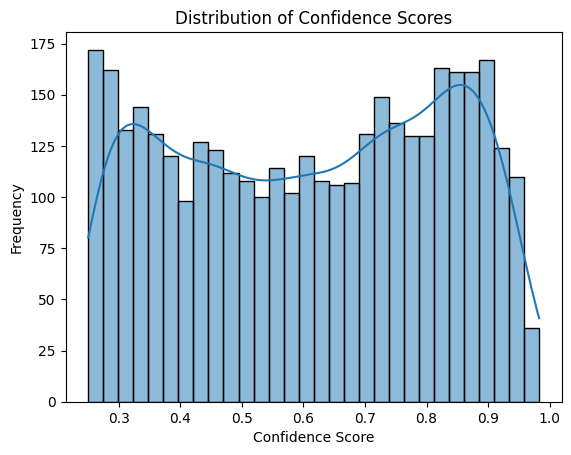

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Histogram of Detection Counts
# Display the number of detections for each class.
sns.barplot(x=detection_counts.index, y=detection_counts.values)
plt.title('Detection Counts per Class')
plt.xlabel('Class ID')
plt.ylabel('Number of Detections')
plt.show()

# Average Confidence Scores per Class
sns.barplot(x=average_confidence.index, y=average_confidence.values)
plt.title('Average Confidence Scores per Class')
plt.xlabel('Class ID')
plt.ylabel('Average Confidence Score')
plt.show()

# Boxplot for Confidence Scores
# The distribution of confidence scores for each class.
sns.boxplot(x='Class_ID', y='Confidence', data=df_detections)
plt.title('Confidence Score Distribution per Class')
plt.xlabel('Class ID')
plt.ylabel('Confidence Score')
plt.show()

# Histogram of Confidence Scores
# The overall distribution of confidence scores across all detections.
sns.histplot(df_detections['Confidence'], bins=30, kde=True)
plt.title('Distribution of Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.show()



:

# Testing:

In [ ]:
!python /content/drive/MyDrive/Furniture-DS/yolov7/detect.py \ # The path to the YOLOv7 detect.py script, which performs object detection for testing.
 --weights /content/drive/MyDrive/Furniture-DS/yolov7/runs/train/exp3/weights/best.pt \
 --img 640 \
 --conf 0.25 \
 --source /content/drive/MyDrive/Furniture-DS/test/images \
 --save-txt \
 --save-conf # Save detection results with confidence scores to text files


Namespace(weights=['/content/drive/MyDrive/Furniture-DS/yolov7/runs/train/exp3/weights/best.pt'], source='/content/drive/MyDrive/Furniture-DS/test/images', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=True, save_conf=True, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
IDetect.fuse
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 208 layers, 6034656 parameters, 0 gradients, 13.1 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 ac, 1 single_siz